In [3]:
from google.colab import userdata

In [4]:
API_KEY = userdata.get('GOOGLE_API_KEY')

In [10]:
import requests
# URL of the image
image_url = "https://i.pinimg.com/736x/80/35/03/80350376d5c7b9aedd97e813e8de6c4c.jpg"
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file in binary write mode
    with open("downloaded_image.jpg", "wb") as file:
        # Write the content of the response to the file
        file.write(response.content)
    print("Image downloaded successfully!")
else:
    print(f"Failed to download image. Status code: {response.status_code}")


Image downloaded successfully!


In [13]:
import PIL.Image
img = PIL.Image.open('downloaded_image.jpg')

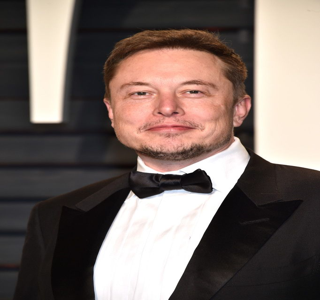

In [14]:
resized_img = img.resize((320, 300))
resized_img

In [15]:
import google.generativeai as genai
from IPython.display import Markdown, clear_output, display

prompt = input(str('Enter your prompt: '))

genai.configure(api_key=API_KEY)

model = genai.GenerativeModel(model_name='gemini-1.5-flash')  # or gemini-1.5-pro
response = model.generate_content([prompt, img], stream=True)

buffer = []
for chunk in response:
    for part in chunk.parts:
        buffer.append(part.text)
    clear_output()
    display(Markdown(''.join(buffer)))

That's Elon Musk.  He's a business magnate, industrial designer, and engineer.  He's known for his roles as the founder, CEO, and chief engineer at SpaceX; early-stage investor, CEO, and product architect of Tesla, Inc.; and founder of X Corp., the parent company of Twitter, among other ventures.
